In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,20)
matplotlib.rcParams["image.cmap"]="gray"
matplotlib.rcParams["axes.titlesize"] = 20
matplotlib.rcParams['axes.titlecolor']="white"

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

In [10]:
filename = DATA_PATH+"images/girl.jpg"
original = cv2.imread(filename)
img = np.copy(original)

originalValue = [0,50,100,150,200,255]

rCurve = np.array([0,80,150, 190,220,255])
bCurve = np.array([0,20,40, 75,150,255])

fullrange = np.arange(0,256)

rLut = np.interp(fullrange,originalValue,rCurve)
bLut = np.interp(fullrange,originalValue,bCurve)

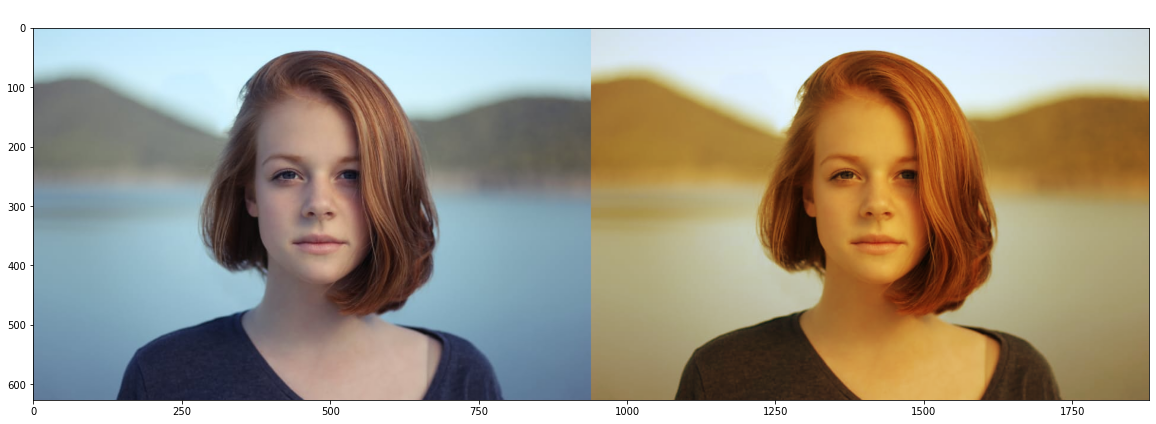

In [11]:
bChannel = img[...,0]
bChannel = cv2.LUT(bChannel,bLut)
img[:,:,0] = bChannel

rChannel = img[...,2]
rChannel = cv2.LUT(rChannel,rLut)
img[:,:,2] = rChannel

combined = np.hstack([original,img])

plt.imshow(combined[...,::-1])
plt.title("Warming filter Output")
plt.show()


Cooling Filter

In [12]:
original = cv2.imread(filename)
img = np.copy(original)

In [13]:
originalValue = np.array([0,50,100,150,200,255])

rCurve = np.array([0,20,40,75,150,255])
bCurve = np.array([0,80,150,190,220,255])

fullrange = np.arange(0,256)
rLut = np.interp(fullrange,originalValue,rCurve)
bLut = np.interp(fullrange,originalValue,bCurve)

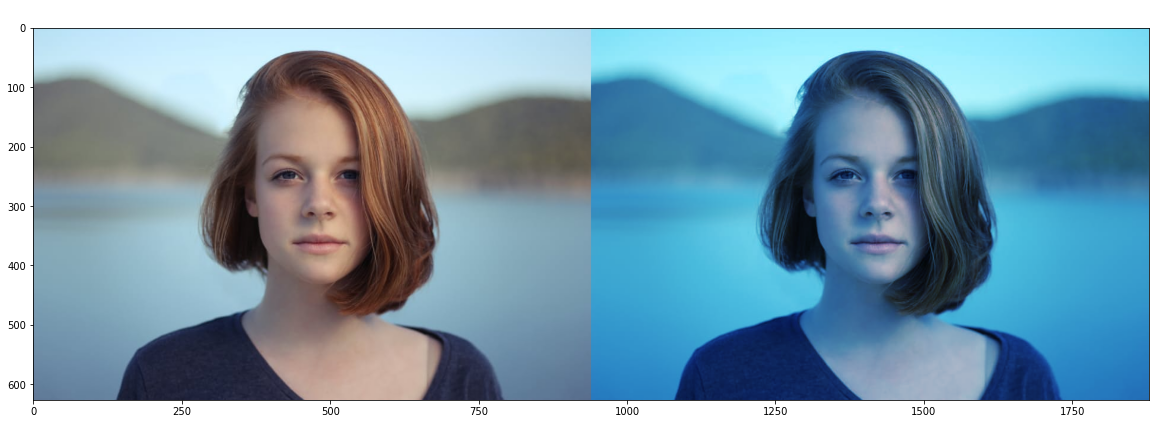

In [14]:
bChannel = img[...,0]
bChannel = cv2.LUT(bChannel,bLut)
img[...,0]=bChannel

rChannel = img[...,2]
rChannel = cv2.LUT(rChannel,rLut)
img[...,2]=rChannel

combined = np.hstack([original,img])

plt.imshow(combined[...,::-1])
plt.title("Cooling filter output")
plt.show()


Some other varriance

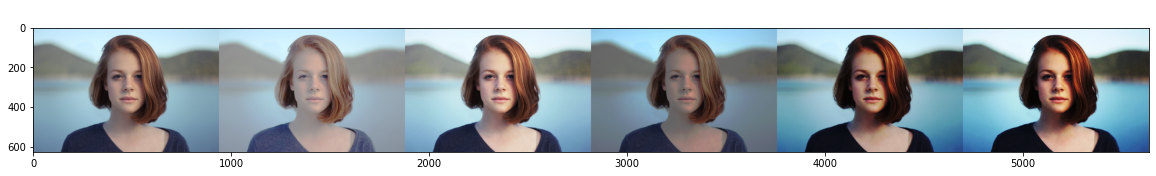

In [19]:
def applyFilter(filter):
    original = cv2.imread(filename)
    img = np.copy(original)

    originalValue = np.array([0,25,50,75,100,125,150,175,200,225,255])

    bCurve = filter
    gCurve = filter
    rCurve = filter


    fullrange = np.arange(0,256)
    bLut = np.interp(fullrange,originalValue,bCurve)
    gLut = np.interp(fullrange,originalValue,gCurve)
    rLut = np.interp(fullrange,originalValue,rCurve)

    bChannel = img[...,0]
    bChannel = cv2.LUT(bChannel,bLut)
    img[...,0]=bChannel

    gChannel = img[...,1]
    gChannel = cv2.LUT(gChannel,gLut)
    img[...,1] = gChannel

    rChannel = img[...,2]
    rChannel = cv2.LUT(rChannel,rLut)
    img[...,2] = rChannel

    return img

filter1 = applyFilter(np.array([0,50,100,125,140,150,160,175,200,225,255]))
filter2 = applyFilter(np.array([0,25,50,75,110,150,180,210,230,240,255]))
filter3 = applyFilter(np.array([0,25,50,75,100,105,120,130,160,200,255]))
filter4 = applyFilter(np.array([0,10,20,30,50,100,150,175,200,225,255]))
filter5 = applyFilter(np.array([0,10,20,30,50,100,160,200,230,240,255]))

combined = np.hstack([original,filter1,filter2,filter3,filter4,filter5])

plt.imshow(combined[...,::-1])
plt.title("Effects")
plt.show()
